<a href="https://colab.research.google.com/github/Ananya63/DSA-codes/blob/main/Ass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment: write a python program to develop regression model using (1) Normal Method (2) Gradient Decent Search algorithm ( Stochastic Gradient Descent and Batch gradient descent )

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/content/sample_data/Housing.csv')

# Separate target variable and features
X = data.drop(columns=['price'])
y = data['price'].values.reshape(-1, 1)

In [16]:
# Identify categorical features
categorical_features = X.select_dtypes(include=['object']).columns

# One-hot encode categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical = encoder.fit_transform(X[categorical_features])

# Convert encoded features to DataFrame and merge with numerical features
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))
X = pd.concat([X.drop(columns=categorical_features), encoded_df], axis=1)
print(X)

from sklearn.preprocessing import MinMaxScaler
# Standardize features
scaler = MinMaxScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
X[num_vars] = scaler.fit_transform(data[num_vars])
#X_scaled = scaler.fit_transform(X)

print(X)
# Add intercept term to the standardized feature set
X_b_scaled = np.c_[np.ones((X.shape[0], 1)), X]
print(X_b_scaled)
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_b_scaled, y, test_size=0.2, random_state=2)

         area  bedrooms  bathrooms   stories   parking  mainroad_yes  \
0    0.396564       0.6   0.333333  0.666667  0.666667           1.0   
1    0.502405       0.6   1.000000  1.000000  1.000000           1.0   
2    0.571134       0.4   0.333333  0.333333  0.666667           1.0   
3    0.402062       0.6   0.333333  0.333333  1.000000           1.0   
4    0.396564       0.6   0.000000  0.333333  0.666667           1.0   
..        ...       ...        ...       ...       ...           ...   
540  0.092784       0.2   0.000000  0.000000  0.666667           1.0   
541  0.051546       0.4   0.000000  0.000000  0.000000           0.0   
542  0.135395       0.2   0.000000  0.000000  0.000000           1.0   
543  0.086598       0.4   0.000000  0.000000  0.000000           0.0   
544  0.151203       0.4   0.000000  0.333333  0.000000           1.0   

     guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0              0.0           0.0                  0.0    

In [17]:
# Normal Equation for linear regression
 #(np.linalg.inv(X_train.T.dot(X_train))).dot((X_train.T).dot(y_train))
theta_normal =np.dot((np.linalg.inv(np.dot(X_train.T, X_train))),(np.dot(X_train.T, y_train)))
print("Parameters using Normal Equation:", theta_normal)

Parameters using Normal Equation: [[ 1.75000000e+06]
 [-6.70552254e-08]
 [-9.49949026e-08]
 [ 5.21540642e-08]
 [ 1.49011612e-08]
 [ 9.31322575e-09]
 [ 9.31322575e-10]
 [ 9.31322575e-10]
 [-9.31322575e-10]
 [ 3.72529030e-09]
 [ 7.45058060e-09]
 [ 5.58793545e-09]
 [-1.49011612e-08]
 [-1.86264515e-08]
 [ 1.15500000e+07]]


In [22]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [59]:
def batch_gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    tolerance=1e-6

    for i in range(iterations):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
        cost_history.append(compute_cost(X, y, theta))

        # Check if the cost difference is within the tolerance level
        if i > 0 and abs(cost_history[-2] - cost_history[-1]) < tolerance:
            print(f"Convergence reached at iteration {i}")
            break

    return theta, cost_history

# Parameters for Batch Gradient Descent
learning_rate = 0.03
iterations = 10000000
initial_theta = np.random.randn(X_train.shape[1], 1)

# Run Batch Gradient Descent
theta_batch, cost_history_batch = batch_gradient_descent(X_train, y_train, initial_theta, learning_rate, iterations)
print("Parameters using Batch Gradient Descent:", theta_batch)


Convergence reached at iteration 85498
Parameters using Batch Gradient Descent: [[ 1.75000001e+06]
 [ 3.90278749e-01]
 [-1.98440654e-02]
 [ 2.50953662e-01]
 [ 9.59130501e-02]
 [ 3.45616031e-02]
 [ 1.34128830e-02]
 [ 1.60272345e-02]
 [ 2.80023257e-02]
 [ 6.26508495e-02]
 [ 5.15729596e-02]
 [ 3.98263461e-02]
 [-1.28141838e-03]
 [-2.97176662e-02]
 [ 1.15499992e+07]]


In [60]:
def stochastic_gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    tolerance=1e-6

    for epoch in range(iterations):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients
        cost_history.append(compute_cost(X, y, theta))

        # Check if the cost difference is within the tolerance level
        if epoch > 0 and abs(cost_history[-2] - cost_history[-1]) < tolerance:
            print(f"Convergence reached at iteration {epoch}")
            break

    return theta, cost_history

# Parameters for Stochastic Gradient Descent
learning_rate = 0.03
iterations = 1000

# Run Stochastic Gradient Descent
theta_sgd, cost_history_sgd = stochastic_gradient_descent(X_train, y_train, initial_theta, learning_rate, iterations)
print("Parameters using Stochastic Gradient Descent:", theta_sgd)


Convergence reached at iteration 34
Parameters using Stochastic Gradient Descent: [[ 1.75000000e+06]
 [ 2.29431867e-02]
 [-6.51997226e-04]
 [ 1.39247332e-02]
 [ 5.08586203e-03]
 [ 1.74520509e-03]
 [ 1.26258934e-04]
 [ 1.97016393e-03]
 [ 1.76278235e-03]
 [ 3.51528734e-03]
 [ 2.72406045e-03]
 [ 1.58940134e-03]
 [-1.68942530e-04]
 [-2.10991118e-03]
 [ 1.15500000e+07]]


In [61]:
def mean_squared_error(y_true, y_pred):
    n = len(y_true)
    mse = (1/ (2*n)) * np.sum((y_true - y_pred) ** 2)
    return mse

In [62]:
# 1. MSE using Normal Equation
y_pred_normal = X_test.dot(theta_normal)
mse_normal = mean_squared_error(y_test, y_pred_normal)
print("MSE using Normal Equation:", mse_normal)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_normal)
print("using method:",mse)

# 2. MSE using Batch Gradient Descent
y_pred_batch = X_test.dot(theta_batch)
mse_batch = mean_squared_error(y_test, y_pred_batch)
print("\nMSE using Batch Gradient Descent:", mse_batch)
mse_batch = mean_squared_error(y_test, y_pred_batch)
print("using method:",mse_batch)

# 3. MSE using Stochastic Gradient Descent
y_pred_sgd = X_test.dot(theta_sgd)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
print("\nMSE using Stochastic Gradient Descent:", mse_sgd)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
print("using method:",mse_sgd)

np.savetxt('NORMAL_W.txt', theta_normal)
np.savetxt('BatchGradient_W.txt', theta_batch)
np.savetxt('StochasticGradient_W.txt', theta_sgd)

MSE using Normal Equation: 8.737366478264399e-16
using method: 1.7474732956528798e-15

MSE using Batch Gradient Descent: 2.962846251285901e-05
using method: 2.962846251285901e-05

MSE using Stochastic Gradient Descent: 2.962846251285901e-05
using method: 2.962846251285901e-05


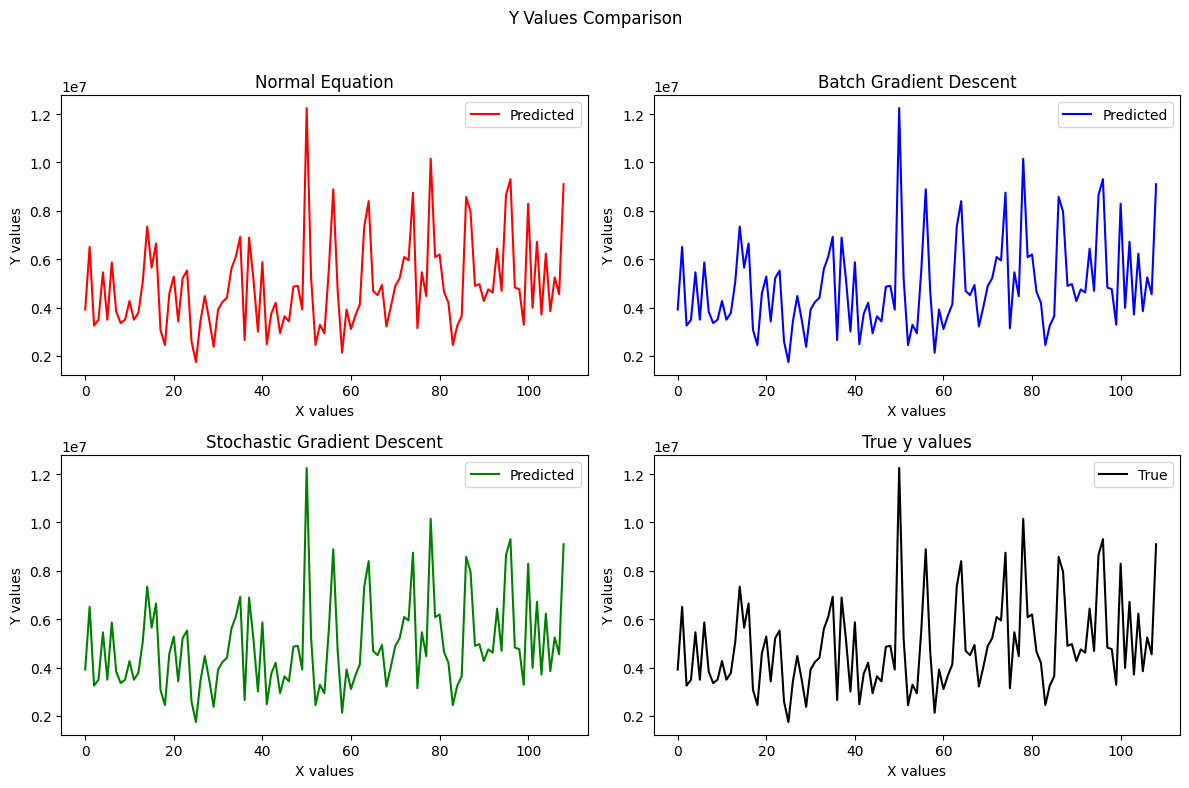

In [80]:
plt.figure(figsize=(12, 8))

plt.subplot(2,2,1)
plt.plot(y_pred_normal, color = 'r', label="Predicted")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Normal Equation")
plt.legend()

plt.subplot(2,2,2)
plt.plot(y_pred_batch, color = 'b', label="Predicted")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Batch Gradient Descent")
plt.legend()

plt.subplot(2,2,3)
plt.plot(y_pred_sgd, color = 'g', label="Predicted")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Stochastic Gradient Descent")
plt.legend()

plt.subplot(2,2,4)
plt.plot(y_test, color = 'k', label="True")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("True y values")
plt.legend()

plt.suptitle("Y Values Comparison")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()